#### INTEGRANTES: JORGE HERRERA - FABIÁN LEAL- ANGIE VILLAMIL

# Instrucciones

El laboratorio tiene 6 ptos, donde obtener 6 ptos equivale a un 7.0 y 0 ptos a un 1.0. 

El formato de entrega será subir a u-cursos un Jupyter notebook
laboratorio1.ipynb, que se debe ejecutar sin errores desde la primera celda a la última. Todo el código debe estar en el mismo notebook, el código debe estar comentado y el notebook debe estar escrito en forma de informe técnico, escribiendo
una celda markdown antes de cada celda de código.


## 1. Implementar la clase MyMatrix  (3 ptos)

En esta sección usted deberá crear:
1. Una clase MyMatrix que sirva para almacenar matrices.
2. Implementar los métodos descritos abajo y testearlos.

Debe utilizar sólo la estructura de datos de Python por defecto (no usar liberías ni herencia).

In [0]:
class MyMatrix():
    
    #Método para instanciar un objeto clase matriz. Debe entregar una excepción si el número de columnas de cada fila no es el mismo.
    def __init__(self,x):
        
        self.x=x
        self.m=len(x)
        self.n=len(x[0])
        
        for i in range(self.m):
            if len(x[i])!= self.n:
                raise ValueError('Tamaño no adecuado')
    
    #Método print. Imprime en pantalla la matriz.    
    def __str__(self):
        return str(self.x)

    #Método para indexar. Retorna un elemeno de la matriz en una posición específica.
    def getitem(self,row,col):
        if row>self.m or col>self.n or row<0 or col<0:
            raise ValueError('Fuera de rango')
        else:
            return self.x[row][col]
    
    #Método para calcular el largo de una matriz = número de filas.
    def __len__(self):
        return self.m
    
    #Método para calcular la dimensión de una matriz. Retorna una tupla de la forma (n_filas, n_columnas).
    def shape(self):
        return (self.m,self.n)
        
    #Método para sumar matrices del mismo tamaño. Debe entregar una excepción si se intenta sumar matrices de diferente tamaño.            
    def __add__(self,other):
        if self.shape() == other.shape():
            c=self.x
            for i in range(self.m):
                for j in range(self.n):
                    c[i][j]+=other.getitem(i,j)
            return c
        else:
            raise ValueError('Dimensiones diferentes')
    
    #Método para restar matrices. Debe entregar una excepción si se intenta restar matrices de diferente tamaño.    
    def __sub__(self,other):
        if self.shape() == other.shape():
            #c=[[0]*self.n]*self.m
            c=self.x
            for i in range(self.m):
                for j in range(self.n):
                    c[i][j]+=-other.getitem(i,j)
            return c
        else:
            raise ValueError('Dimensiones diferentes')
            
    #Método de multiplicación de matrices. Debe entregar una excepción si se intenta multiplicar matrices de tamaño no adecuado para multiplicación matricial.    
    def __mul__(self,other):
        
        if self.shape() == other.shape():
            c=self.x
            for i in range(self.m):
                for j in range(other.n):
                    c[i][j]=0
                    for k in range(self.n):
                        c[i][j] += self.getitem(i,k)*other.getitem(k,j)
            return c
        else:
            raise ValueError('Dimensiones no adecuadas')
    
    #Método para transponer una matriz.
    def transpose(self):
        c[[0]*self.n]*self.m
        for j in range(self.m):
            for i in range(self.n):
                c[j][i]=self.getitem(i,j)
                
        return c

# 2. Obtener todos los intervalos disjuntos entre dos listas
Obtener todos los intervalos disjuntos entre dos listas, piense en el caso que tenga las fechas de comienzo y de término de cada formación de una persona y desea calcular sus años de estudio superior, por ejemplo una persona pudo empezar su pregrado en 2012 y terminarlo en 2017, comenzar su magíster en 2015 y terminarlo en 2018, finalmente comenzar su doctorado en 2022 y terminarlo en 2026, esto genera las siguientes variables, tiempo_inicio = [2012, 2015, 2022], tiempo_final = [2017, 2018, 2026] y le gustaría obtener la siguiente lista para calcular los años de estudio, merge(ti, tf) = [[2012, 2018], [2022, 2026]].



In [4]:
#funcion
def merge(t1, t2):
    
    #"traspone" 
    times=[]
    for i in range(len(t1)):
        times.append([t1[i],t2[i]])
    
    #ordena años de inicio
    times.sort(key=lambda r:r[0])
    
    #encuentra intersecciones de izquierda a derecha
    times2=[[],[]]
    
    times2[0].append(min(t1))
    for i in range(len(t1)-1):
        if (times[i][1]<=times[i+1][1] and times[i][1]>=times[i+1][0]) == False:
            times2[1].append(times[i][1])
            times2[0].append(times[i+1][0])
    times2[1].append(max(t2))
    
    
    #encuentra intersecciones de derecha a izquierda
    if times2[1] != sorted(times2[1]):
        times=[]
        for i in range(len(times2[1])):
            times.append([times2[0][i],times2[1][i]])
        
        times.sort(key=lambda r:r[0])
        g=len(times2[1])
        times2=[[],[]]
        times2[0].append(min(t1))
        for i in range(g-1):
            i=i+1
            
            if (times[i][1]<=times[i-1][1] and times[i][1]>=times[i-1][0]) == True:
                
                times2[1].append(times[i-1][1])
                
            else:
                times2[1].append(times[i][1])
                times2[0].append(times[i][0])
                
        times2[1].append(max(t2))
        
    tfinal=[]
    
    #transpone
    for i in range(len(times2[0])):
        tfinal.append([times2[0][i],times2[1][i]])
    
    return tfinal  
        
#ejemplo
ti = [2012, 2015, 2017, 2022, 2026, 2028]
tf = [2017, 2018, 2019, 2026, 2028, 2030]

merge(ti, tf) 

[[2012, 2019], [2022, 2030]]

# 3. Implemente función de correlación (1 pto)

Cree una función para calcular la covarianza entre dos vectores de tipo numpy array, considerando que la varianza muestral viene dada por la siguiente formula:

$$ corr(X, Y) = \frac{\sum_{i=1}^{N} (X_{i}-\bar{X})(Y_{i}-\bar{Y})}{\sqrt{\sum_{i=1}^{N}(X_{i}-\bar{X})^{2}}\sqrt{\sum_{i=1}^{N}(Y_{i}-\bar{Y})^{2}}}$$

Se tiene que la formula anterior es equivalente  a la siguiente 

$$ corr(X, Y) = \frac{<X-\bar{X},Y-\bar{Y}>}{\sqrt{<X-\bar{X},X-\bar{X}><Y-\bar{Y},Y-\bar{Y}>}}$$

donde $<A,B>$ es el producto punto entre los vectores $A$ y $B$


In [2]:
import numpy as np

#funcion correlacion
def corr(a,b):
    ma=sum(a)/len(a)
    mb=sum(b)/len(b)
    return np.dot(a-ma,b-mb)/(np.dot(a-ma,a-ma)*np.dot(b-mb,b-mb))**(1/2)
    

corr(np.array([1,2,3]),np.array([1,2,3]))

1.0

# 4. Implemente función que generé una matriz aleatoria simétrica (1 pto)

def matriz_simetrica(n):

    ...

n = dimensión de la matriz cuadrada

In [3]:
import random

#funcion
def matriz_simetrica(n):
    matriz=[]
    
    #asigna valores aleatorios
    for i in range(0, n):
        matriz.append([])
        for j in range(0, n):
            matriz[i].append(random.randint(1,100))
    
    #la vuelve simetrica
    for i in range(0, n):
        for j in range(0, n):
            matriz [j][i] = matriz[i][j]
    return matriz

matriz_simetrica(5)

[[1, 59, 47, 53, 84],
 [59, 62, 27, 12, 89],
 [47, 27, 68, 65, 30],
 [53, 12, 65, 76, 44],
 [84, 89, 30, 44, 18]]

## Bonus matplotlib (1pto) 
### 1. En una misma visualización dibujar (x, f) y (x, g), donde:
1. X es un vector que toma valores de -2 a 2 con saltos de 0.1, el largo de X es 41
2. $f(x) = \sqrt{1- (|x|-1)^{2}}, \forall x \in X $  
3. $g(x) = -3\sqrt{1- \sqrt{\frac{|x|}{2}}}, \forall x \in X $  
    


In [0]:
import matplotlib.pyplot as plt

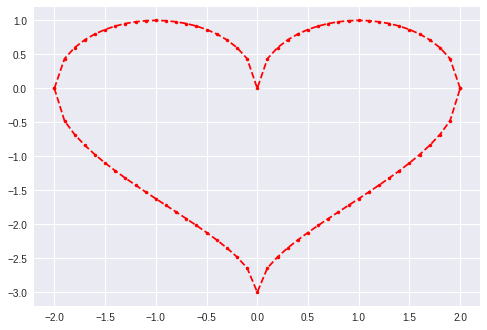

In [7]:
#creación secuencia
x=np.linspace(-2.,2.,num=41)

#funciones
fx=np.sqrt(1-(np.abs(x)-1)**2)
gx=-3*np.sqrt(1-np.sqrt(np.abs(x)/2))

#plot
plt.plot(x,gx,'r.--',x,fx,'r.--')

plt.show()

### 2. En una misma visualización dibujar (x1, y1) y (x2, y1), donde:
1. X1 es un vector de 50 muestras equi-espaciadas en el intervalo [0, 5]
2. X2 es un vector de 50 muestras equi-espaciadas en el intervalo [0, 2] 
3. $y1 =  cos(2\pi x1)\exp(-x1),  \forall x1 \in X1$
4. $y2 =  cos(2\pi x2), \forall x2 \in X2$


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


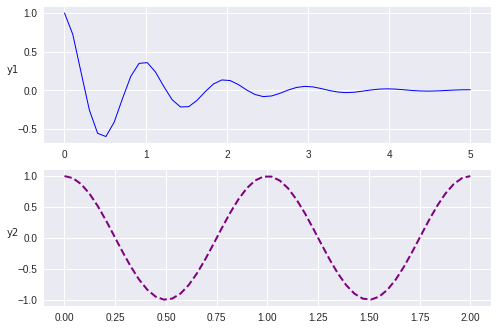

In [8]:
#secuencias
x1=np.linspace(0,5,50)
x2=np.linspace(0,2,50)

#funciones
y1=np.cos(2*np.pi*x1)*np.exp(-x1)
y2=np.cos(2*np.pi*x2)

#plots
plt.subplot(2, 1, 1)
plt.plot(x1, y1, color='blue',marker='+',linewidth=1, markersize=5)
plt.ylabel('y1',fontsize=10,rotation=0, fontname='cursive')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, color='purple',marker='', linestyle='dashed',linewidth=2)
plt.ylabel('y2',fontsize=10,rotation=0, fontname='cursive')

plt.show()